In [45]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy import sparse

In [46]:
N = 5 
d = 2 
C = 4 
X = np.random.randn(d, N)
y = np.random.randint(0,4,(N))

In [47]:
# softmax
def softmax (Z):
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis = 0)
    return A

In [48]:
def softmax_stable(Z):
    e_Z = np.exp(Z)
    b = np.max(Z)
    A = (e_Z - b)/sum(e_Z - b)
    return A

In [49]:
def convert_labels(y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y),(y,np.arange(len(y)))),shape = (C, len(y))).toarray()
    return Y
Y = convert_labels(y,C)
print(Y)
                          

[[0 0 0 0 0]
 [1 0 0 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]]


In [50]:
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))
W_init = np.random.randn(d,C)

def grad(X, Y, W):
    A = softmax(W.T.dot(X))
    E = A - Y 
    return X.dot(E.T)

def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.ones_like(W)
    for i in range (W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i,j] += eps
            W_n[i,j] -= eps
            g[i,j] = (cost(X ,Y ,W_p) - cost(X , Y, W_n))/(2*eps)
    return g
g1 =  grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 -g2))

1.7434350711072215e-09


In [52]:
def softmax_regression(X, y , W_init , eta, tol = 1e-4 , max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y,C)
    it = 0 
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0 
    check_w_after = 20 
    
    while count < max_count :
        mix_id = np.random.permutation(N)
        
        for i in  mix_id:
            xi = X[:, i ].reshape(d,1)
            yi = Y[: , i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T,xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            
            count += 1 
            # tiêu chí dừng
            if count%check_w_after == 0 :
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

eta = 0.05
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X,y,W_init, eta)


In [53]:
def pred(W, X):
    A = softmax_stable(W[-1].T.dot(X))
    return np.argmax(A, axis = 0)

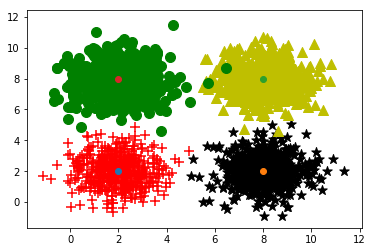

In [54]:
means = np.array([[2,2,2,2,2],[8,2,8,2,8],[8,8,8,8,8],[2,8,2,8,2]]) # trung tâm xác suất
cov = np.identity(5)
N = 500

X0 = np.random.multivariate_normal(means[0],cov, N)
X1 = np.random.multivariate_normal(means[1],cov, N)                                 
X2 = np.random.multivariate_normal(means[2],cov, N)                                 
X3 = np.random.multivariate_normal(means[3],cov, N)                                 
                                
X = np.concatenate((X0,X1,X2,X3), axis = 0).T

X = np.concatenate((np.ones((1,4*N)), X),axis = 0)

C = 4 

original_label = np.asarray([0]*N +[1]*N + [2]*N +[3]*N ).T                          
                                 
plt.scatter(X0[:,0],X0[:,1],s = 100 ,marker = '+', color = 'r')
plt.scatter(X1[:,0],X1[:,1],s = 100, marker = '*', color = 'k')
plt.scatter(X2[:,0],X2[:,1],s = 100,marker= '^',color = 'y' )
plt.scatter(X3[:,0],X3[:,1],s = 100,marker= 'o',color = 'g' )

plt.scatter(means[0,0],means[0,1])
plt.scatter(means[1,0],means[1,1])
plt.scatter(means[2,0],means[2,1])
plt.scatter(means[3,0],means[3,1])


In [57]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W_init)


[[ 0.47980561 -0.1350732   0.66096124 -0.09588676]
 [-0.14931558  0.94101654 -0.09697841 -0.23034008]
 [-0.48113737  1.43437485 -1.20993337 -0.92308504]
 [ 1.11594386 -0.37904261 -0.98318029  1.7074962 ]
 [ 2.21420794 -0.85924883  1.13965742  1.14709412]
 [-0.7827058   0.73528876  0.12380264  1.83638877]]
